In [3]:
from solar_getter import get_solar, convert_to_energy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import json
%matplotlib inline

In [18]:
api_key = os.environ.get('NREL')
lat, lon= 42.3583452, -71.0937524
lat2, lon2= 42.3783452, -71.0937524
attributes = 'ghi,dhi,dni,wind_speed_10m_nwp,surface_air_temperature_nwp,solar_zenith_angle'
year = '2011'
leap_year = 'false'
interval = '30'
# NOTE: In order to use the NSRDB data in SAM, you must specify UTC as 'false'. SAM requires the data to be in the local time zone.
utc = 'false'
# Your full name, use '+' instead of spaces.
your_name = 'James+Long'
# Your email address
your_email = 'jjlong@mit.edu'
# Please join our mailing list so we can keep you up-to-date on new developments.
# Your affiliation
your_affiliation = 'mit'

In [19]:
fname = 'killian_court'
meta, df = solar_getter.get_solar(fname, year=year, lat=lat, lon=lon,
                    leap_year=leap_year, interval=interval,
                    utc=utc, your_name=your_name, your_email=your_email,
                    your_affiliation=your_affiliation,
                    api_key=api_key, attributes=attributes)
meta2, df2 = get_solar(fname, year=year, lat=lat2, lon=lon2,
                    leap_year=leap_year, interval=interval,
                    utc=utc, your_name=your_name, your_email=your_email,
                    your_affiliation=your_affiliation,
                    api_key=api_key, attributes=attributes)

metadata:  {'Clearsky GHI Units': 'w/m2', 'Precipitable Water Units': 'mm', 'Cloud Type 9': 'Overshooting', 'Dew Point Units': 'c', 'Fill Flag 3': 'Exceeds Clearsky', 'Pressure Units': 'mbar', 'State': '-', 'Cloud Type 8': 'Overlapping', 'Solar Zenith Angle Units': 'Degree', 'Clearsky DHI Units': 'w/m2', 'Elevation': 18, 'Cloud Type 4': 'Super-Cooled Water', 'Source': 'NSRDB', 'DHI Units': 'w/m2', 'Cloud Type -1': nan, 'Local Time Zone': -5, 'Wind Speed': 'm/s', 'Cloud Type 10': 'Unknown', 'Fill Flag 1': 'Missing Image', 'Latitude': 42.37, 'Cloud Type 5': 'Mixed', 'GHI Units': 'w/m2', 'Cloud Type 1': 'Probably Clear', 'Version': 'v2.0.1', 'Cloud Type 3': 'Water', 'Fill Flag 2': 'Low Irradiance', 'Cloud Type 6': 'Opaque Ice', 'DNI Units': 'w/m2', 'Temperature Units': 'c', 'Snow Depth Units': 'm', 'Cloud Type 7': 'Cirrus', 'Country': '-', 'Fill Flag 0': nan, 'Clearsky DNI Units': 'w/m2', 'Cloud Type 0': 'Clear', 'Relative Humidity Units': '%', 'Longitude': -71.1, 'Time Zone': -5, 'Cloud 

In [4]:
dfpre = pd.read_csv('killian_court.csv')
with open('killian_court.metadata.json') as f:
    metapre = json.load(f)

In [20]:
generated, dcnet,acnet = convert_to_energy(meta, df)
gen2, dcnet2, acnet2 = convert_to_energy(meta2, df2)

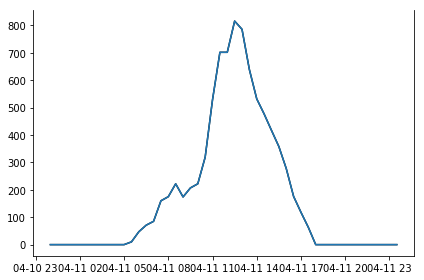

In [21]:
fig, ax = plt.subplots(1)
df['gen'] = generated #kW
df['dc'] = dcnet
df['ac'] = acnet
df2['gen'] = gen2 #kW
df2['dc'] = dcnet2
df2['ac'] = acnet2
day = 100
ax.plot(df['GHI'].iloc[day*48:day*48+48], label='Glob. Horiz. Irrad.(W)', color='k')
ax.plot(df2['GHI'].iloc[day*48:day*48+48], label='comp')
#ax.plot(df['DHI'].iloc[day*48:+day*48+48], label='Glob. Horiz. Irrad.(W)', color='g')

#ticks = [tick for tick in ax.get_xticks()]
#ax.set_xticklabels( ticks, rotation=45 )
#ax2 = ax.twinx()
#fig, ax = plt.subplots(1)
#ax.plot(df['gen'].iloc[0:48], label='Generated energy (kW)', color='k', marker= 'o')

#ax2.plot(df['dc'].iloc[day*48:+day*48+48], label='DC array energy (W)', color='r')
#ax2.plot(df['ac'].iloc[day*48:+day*48+48], label='AC inverter energy (W)', color='b')
#ax.legend()
#ax2.legend()
fig.tight_layout()
sns.despine(top=True, right=False)
#sns.despine()


In [12]:
df2.head(5)

,Year,Month,Day,Hour,Minute,GHI,DHI,DNI,Wind Speed,Temperature,Solar Zenith Angle,gen,dc,ac
2011-01-01 00:00:00,2011,1,1,0,0,0,0,0,1.034736,-0.311407,160.490526,0.0,0.0,0.0
2011-01-01 00:30:00,2011,1,1,0,30,0,0,0,1.031998,-0.363226,158.750697,0.0,0.0,0.0
2011-01-01 01:00:00,2011,1,1,1,0,0,0,0,1.029260,-0.415045,155.506586,0.0,0.0,0.0
2011-01-01 01:30:00,2011,1,1,1,30,0,0,0,1.027027,-0.432654,151.276831,0.0,0.0,0.0
2011-01-01 02:00:00,2011,1,1,2,0,0,0,0,1.024794,-0.450293,146.450206,0.0,0.0,0.0


In [8]:
meta

{'City': '-',
 'Clearsky DHI Units': 'w/m2',
 'Clearsky DNI Units': 'w/m2',
 'Clearsky GHI Units': 'w/m2',
 'Cloud Type -1': nan,
 'Cloud Type 0': 'Clear',
 'Cloud Type 1': 'Probably Clear',
 'Cloud Type 10': 'Unknown',
 'Cloud Type 11': 'Dust',
 'Cloud Type 12': 'Smoke',
 'Cloud Type 2': 'Fog',
 'Cloud Type 3': 'Water',
 'Cloud Type 4': 'Super-Cooled Water',
 'Cloud Type 5': 'Mixed',
 'Cloud Type 6': 'Opaque Ice',
 'Cloud Type 7': 'Cirrus',
 'Cloud Type 8': 'Overlapping',
 'Cloud Type 9': 'Overshooting',
 'Country': '-',
 'DHI Units': 'w/m2',
 'DNI Units': 'w/m2',
 'Dew Point Units': 'c',
 'Elevation': 18,
 'Fill Flag 0': nan,
 'Fill Flag 1': 'Missing Image',
 'Fill Flag 2': 'Low Irradiance',
 'Fill Flag 3': 'Exceeds Clearsky',
 'Fill Flag 4': 'Missing CLoud Properties',
 'Fill Flag 5': 'Rayleigh Violation',
 'GHI Units': 'w/m2',
 'Latitude': 42.37,
 'Local Time Zone': -5,
 'Location ID': 1325726,
 'Longitude': -71.1,
 'Precipitable Water Units': 'mm',
 'Pressure Units': 'mbar',
 'Rel

NameError: name 'generated' is not defined

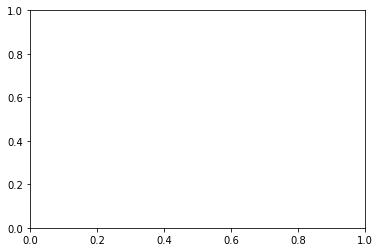

In [4]:
fig, ax = plt.subplots(1)
ax.plot(generated[0:48])